In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Aggregate transaction data by CustomerID
transaction_features = transactions.groupby("CustomerID").agg(
    TotalSpend=("TotalValue", "sum"),
    AvgTransactionValue=("TotalValue", "mean"),
    TotalQuantity=("Quantity", "sum")
).reset_index()

# Merge with customer data
data = pd.merge(customers, transaction_features, on="CustomerID", how="left")

# Fill missing transaction data (e.g., customers with no transactions)
data.fillna(0, inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder_region = LabelEncoder()
data["Region_Encoded"] = label_encoder_region.fit_transform(data["Region"])

# Drop unnecessary columns for clustering
data_clustering = data.drop(columns=["CustomerID", "CustomerName", "Region", "SignupDate"])


In [26]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)


Text(0.5, 1.0, 'Davies-Bouldin Index')

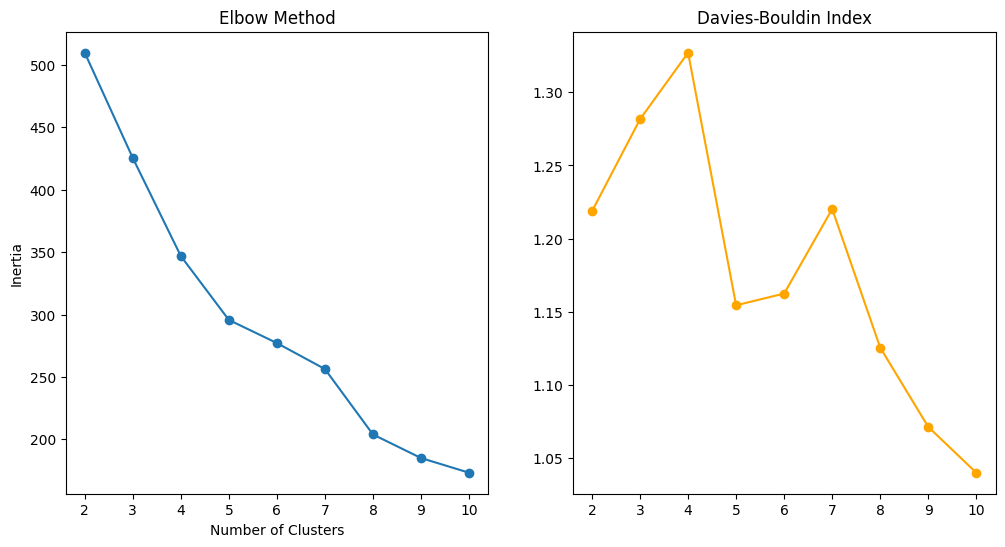

In [27]:
# Elbow Method to determine optimal clusters
inertia = []
db_indices = []

for k in range(2, 11):  # Test clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

    # Calculate DB Index
    labels = kmeans.labels_
    db_index = davies_bouldin_score(data_scaled, labels)
    db_indices.append(db_index)

# Plot the Elbow Method and DB Index
plt.figure(figsize=(12, 6))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# DB Index
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), db_indices, marker='o', color='orange')
plt.title('Davies-Bouldin Index')


In [28]:
# Fit the KMeans model with the optimal number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to the original data
data["Cluster"] = kmeans.labels_


<ipython-input-29-1cec152bc1f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=data, palette="viridis")


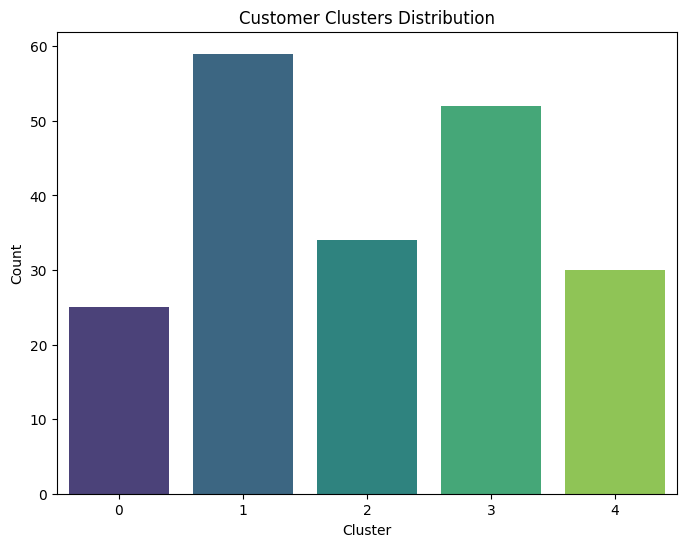

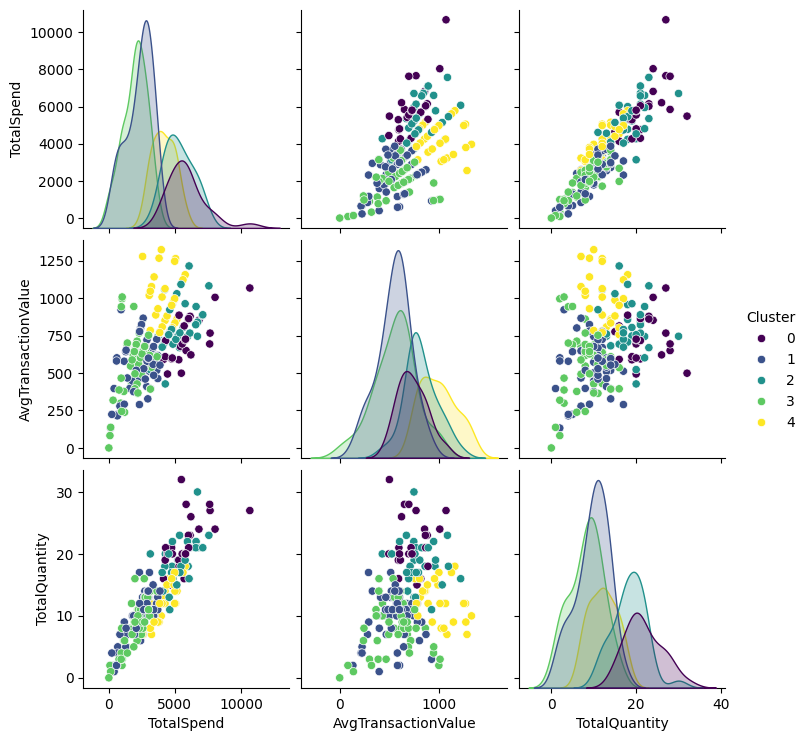

In [29]:
# Visualize cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Cluster", data=data, palette="viridis")
plt.title("Customer Clusters Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Pairplot of clusters (using two important features for visualization)
sns.pairplot(data, hue="Cluster", vars=["TotalSpend", "AvgTransactionValue", "TotalQuantity"], palette="viridis")
plt.show()


In [30]:
# Calculate the DB Index
db_index_final = davies_bouldin_score(data_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index for {optimal_k} clusters: {db_index_final}")


Davies-Bouldin Index for 5 clusters: 1.1543670430257567


Silhouette Score

In [33]:
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled, kmeans.labels_)

0.2793503669812612

Inertia:

In [34]:
kmeans.inertia_

295.6532618523277

Calinski-Harabasz Index

In [35]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(data_scaled, kmeans.labels_)

83.16127929946417